In [1]:
#####################################
### Arrhythmia Dataset
### Number of Samples: 109446
### Number of Categories: 5
### Sampling Frequency: 125Hz
### Data Source: Physionet's MIT-BIH Arrhythmia Dataset
### Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
#####################################

In [2]:
import os
path = "../Images"
if not os.path.exists("../Images"):
    os.makedirs(path)

In [3]:
from sklearn import tree
import pandas as pd
import os

In [4]:
df1 = pd.read_csv(os.path.join("Resources","mitbih_train.csv"), header=None)
df2 = pd.read_csv(os.path.join("Resources","mitbih_test.csv"), header=None)
df = pd.concat([df1, df2], ignore_index=True)
#df.head()
print(df.head(5))

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9   ...   178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

In [5]:
target = df[187] 
target_names = ["0", "1", "2", "3", "4"]
print(target.shape)

(109446,)


In [6]:
data = df.drop(187, axis=1)
feature_names = data.columns
print(data.head(5))

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9   ...   177  178  179  180  181  182  183  184  \
0  0.085784  0.058824  0.049020 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235 ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9559973686134055

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9756962210364739

In [10]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.043110225502004294, 4),
 (0.040510401083831325, 3),
 (0.039708686438722246, 5),
 (0.03089415050436317, 1),
 (0.030529995045318045, 6),
 (0.029536211575444442, 2),
 (0.02031116105983983, 0),
 (0.020104376213820795, 7),
 (0.020031254438254032, 10),
 (0.0187627764914334, 11),
 (0.017989875682039656, 12),
 (0.017613812600291653, 8),
 (0.01735715798367654, 36),
 (0.0169985300070974, 9),
 (0.01676011159876075, 35),
 (0.015175283775979658, 37),
 (0.014632272299425491, 13),
 (0.014460059682528696, 16),
 (0.01297495628969309, 34),
 (0.012546891795249798, 24),
 (0.012296856253414574, 23),
 (0.01225578948123112, 25),
 (0.011939378615566688, 14),
 (0.011554717086925516, 22),
 (0.010852334550626863, 21),
 (0.010634908229240105, 38),
 (0.010388093337246248, 33),
 (0.01030456734118941, 45),
 (0.010249445319911914, 18),
 (0.010061292858376439, 17),
 (0.010014357420833458, 15),
 (0.009864423536674681, 44),
 (0.009770169112608527, 42),
 (0.00944452068640495, 27),
 (0.009431811467130614, 43),
 (0.009

In [13]:
### Predict
y_predict = rf.predict(X_test)

In [15]:
### Confustion Matrix

from sklearn.metrics import confusion_matrix

a = confusion_matrix(y_test, y_predict, labels=[0,1,2,3,4])
a

array([[22688,     6,    23,     1,     2],
       [  241,   424,     8,     0,     2],
       [  183,     0,  1567,     8,     2],
       [   66,     0,    10,   126,     0],
       [  106,     0,     7,     0,  1892]], dtype=int64)

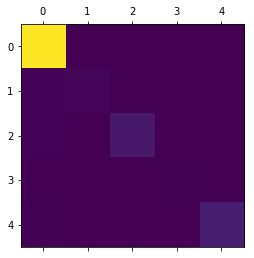

In [16]:
%matplotlib inline
from matplotlib.pyplot import matshow

matshow(a)

In [ ]:
xx = list(range(0,187))
import matplotlib.pyplot as plt

In [ ]:
my_data_0__N = data.iloc[72281]
plt.title("Type: N")
plt.plot(xx, my_data_0__N)

### Save Figure
plt.savefig("../Images/Type-N.png")

In [ ]:
my_data_1__S = data.iloc[72515]
plt.title("Type: S")
plt.plot(xx, my_data_1__S)

### Save Figure
plt.savefig("Tpye-S.png")

In [ ]:
my_data_2__V = data.iloc[74958]
plt.title("Type: V")
plt.plot(xx, my_data_2__V)

### Save Figure
plt.savefig("Type-V.png")

In [ ]:
my_data_3__F = data.iloc[80999]
plt.title("Type: F")
plt.plot(xx, my_data_3__F)

### Save Figure
plt.savefig("Type-F.png")

In [ ]:
my_data_4__Q = data.iloc[87549]
plt.title("Type: Q")
plt.plot(xx, my_data_4__Q)

### Save Figure
plt.savefig("Type-Q.png")